In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def extract_carbon_data(file_path):
    """
    Extract carbon data from the CSV file.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    
    Returns:
    --------
    tuple: (x_values, y_values)
        x_values: Carbon weights
        y_values: Carbon peak areas
    """
    # Read the CSV file
    df = pd.read_csv(file_path, header=None, skip_blank_lines=True)
    
    # Filter rows with Carbon data (Compound Name is 'Carbon')
    carbon_data = df[df[9] == 'Carbon']
    
    # Extract weight and area values
    weights = carbon_data[6].astype(float)
    areas = carbon_data[5].astype(float)
    
    return weights, areas

def perform_linear_regression(x, y):
    """
    Perform linear regression and return regression parameters.
    
    Parameters:
    -----------
    x : array-like
        Independent variable (weights)
    y : array-like
        Dependent variable (areas)
    
    Returns:
    --------
    dict: Regression statistics and parameters
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    return {
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_value**2,
        'p_value': p_value,
        'std_error': std_err
    }

def plot_calibration(x, y, regression_stats):
    """
    Create a calibration plot with regression line.
    
    Parameters:
    -----------
    x : array-like
        Independent variable (weights)
    y : array-like
        Dependent variable (areas)
    regression_stats : dict
        Regression statistics from perform_linear_regression()
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Data Points')
    
    # Create regression line
    line_x = np.array([x.min(), x.max()])
    line_y = regression_stats['slope'] * line_x + regression_stats['intercept']
    plt.plot(line_x, line_y, color='red', label='Regression Line')
    
    plt.title('Carbon Calibration: Area vs Weight')
    plt.xlabel('Carbon Weight [mg]')
    plt.ylabel('Peak Area [mV.s]')
    
    # Add regression equation and R-squared to the plot
    equation = f'y = {regression_stats["slope"]:.4f}x + {regression_stats["intercept"]:.4f}'
    r_squared = f'R² = {regression_stats["r_squared"]:.4f}'
    plt.annotate(f'{equation}\n{r_squared}', 
                 xy=(0.05, 0.95), 
                 xycoords='axes fraction',
                 verticalalignment='top')
    
    plt.legend()
    plt.grid(True)
    plt.show()

def main(file_path):
    """
    Main function to perform carbon calibration analysis.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file
    """
    # Extract carbon data
    weights, areas = extract_carbon_data(file_path)
    
    # Perform linear regression
    regression_stats = perform_linear_regression(weights, areas)
    
    # Print regression statistics
    print("Regression Statistics:")
    for key, value in regression_stats.items():
        print(f"{key}: {value}")
    
    # Create calibration plot
    plot_calibration(weights, areas, regression_stats)

Regression Statistics:
slope: 6907.35253728295
intercept: 1.8830308802221225
r_squared: 0.9995558373076884
p_value: 1.0643967896613096e-14
std_error: 51.47947831550441


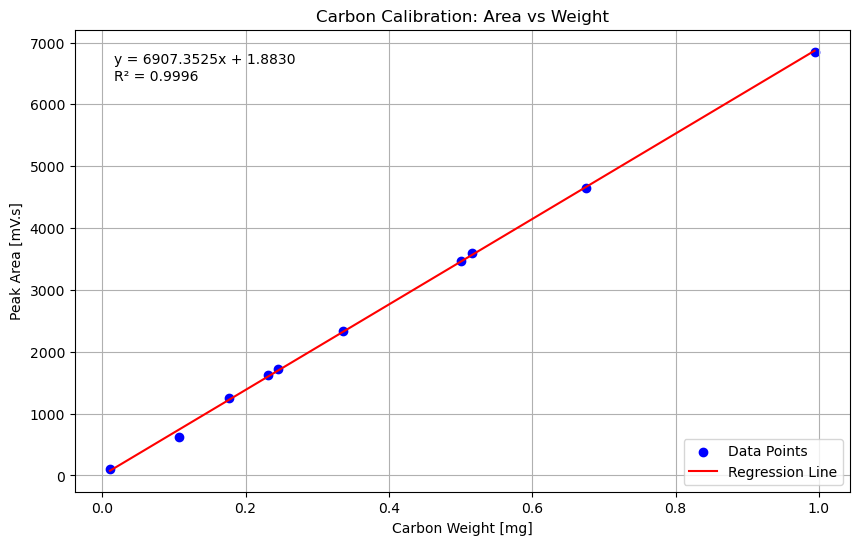

In [3]:
main('Katz_20141210_P-vent_CTO_Test_cal.csv')